<a href="https://colab.research.google.com/github/ksublo/machine_learning/blob/master/Adult_BLO0021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADULT - KSENIIA BLOKHINA - BLO0021



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics, sklearn.ensemble
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


#Description

In [21]:
df_full = pd.read_csv("sample_data/adult.csv")
df_full.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


The original dataset file does not include column names. These were added based on the dataset description available on the [UCI Adult Dataset website](https://archive.ics.uci.edu/dataset/2/adult).

In [22]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df_full.columns = column_names
df_full.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [23]:
df_full.shape

(32560, 15)

In [24]:
df_full.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


| **Column Name**       | **Type**       | **Description**                                                                             |
|-----------------------|----------------|---------------------------------------------------------------------------------------------|
| `age`                | Numeric        | The age of the individual in years.                                                        |
| `workclass`          | Categorical    | Type of employment (e.g., Private, Self-emp-not-inc, Federal-gov, Local-gov, etc.).         |
| `fnlwgt`             | Numeric        | Final weight, representing the number of people in the population each individual accounts for. |
| `education`          | Categorical    | The highest level of education completed (e.g., Bachelors, HS-grad, Masters).              |
| `education-num`      | Numeric        | Numerical representation of education level.                                               |
| `marital-status`     | Categorical    | Marital status (e.g., Never-married, Married-civ-spouse, Divorced, etc.).                  |
| `occupation`         | Categorical    | Type of job or occupation (e.g., Tech-support, Exec-managerial, Sales).                    |
| `relationship`       | Categorical    | Relationship to the household (e.g., Husband, Wife, Not-in-family).                        |
| `race`               | Categorical    | Race of the individual (e.g., White, Black, Asian-Pac-Islander).                           |
| `sex`                | Categorical    | Gender of the individual (Male, Female).                                                  |
| `capital-gain`       | Numeric        | Income from capital gains.                                                                 |
| `capital-loss`       | Numeric        | Losses from capital investments.                                                           |
| `hours-per-week`     | Numeric        | Number of hours worked per week.                                                           |
| `native-country`     | Categorical    | Country of origin (e.g., United-States, Mexico, Canada).                                   |
| `income`             | Categorical    | Target variable: Income level (`<=50K` or `>50K`).                                         |

---

## NaN values

In [25]:
nan_check = df_full.isna().sum()
nan_check

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


There is not any NaN values, but i think we should check it for the "?" values, it's the same to the NaN, but just not clear space in that dataset.

In [26]:
question_mark_check = (df_full == " ?").sum()
question_mark_check

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


I decided to drop the incomplete rows because the occupation, workclass, and native-country columns are important for our analysis. Therefore, it is better to proceed without rows containing missing data.

In [27]:
df_full.replace(" ?", pd.NA, inplace=True)

df_full.dropna(subset=['occupation', 'workclass', 'native-country'], inplace=True)

df_full.shape

(30161, 15)

The number of rows in our dataset has decreased by a little more than 2,000 after dropping the incomplete rows. However, the dataset is still large and robust enough to proceed with the analysis.

The dataset shape before cleaning was (32560, 15), and after dropping the incomplete rows, the shape is (30162, 15)

## Visualization

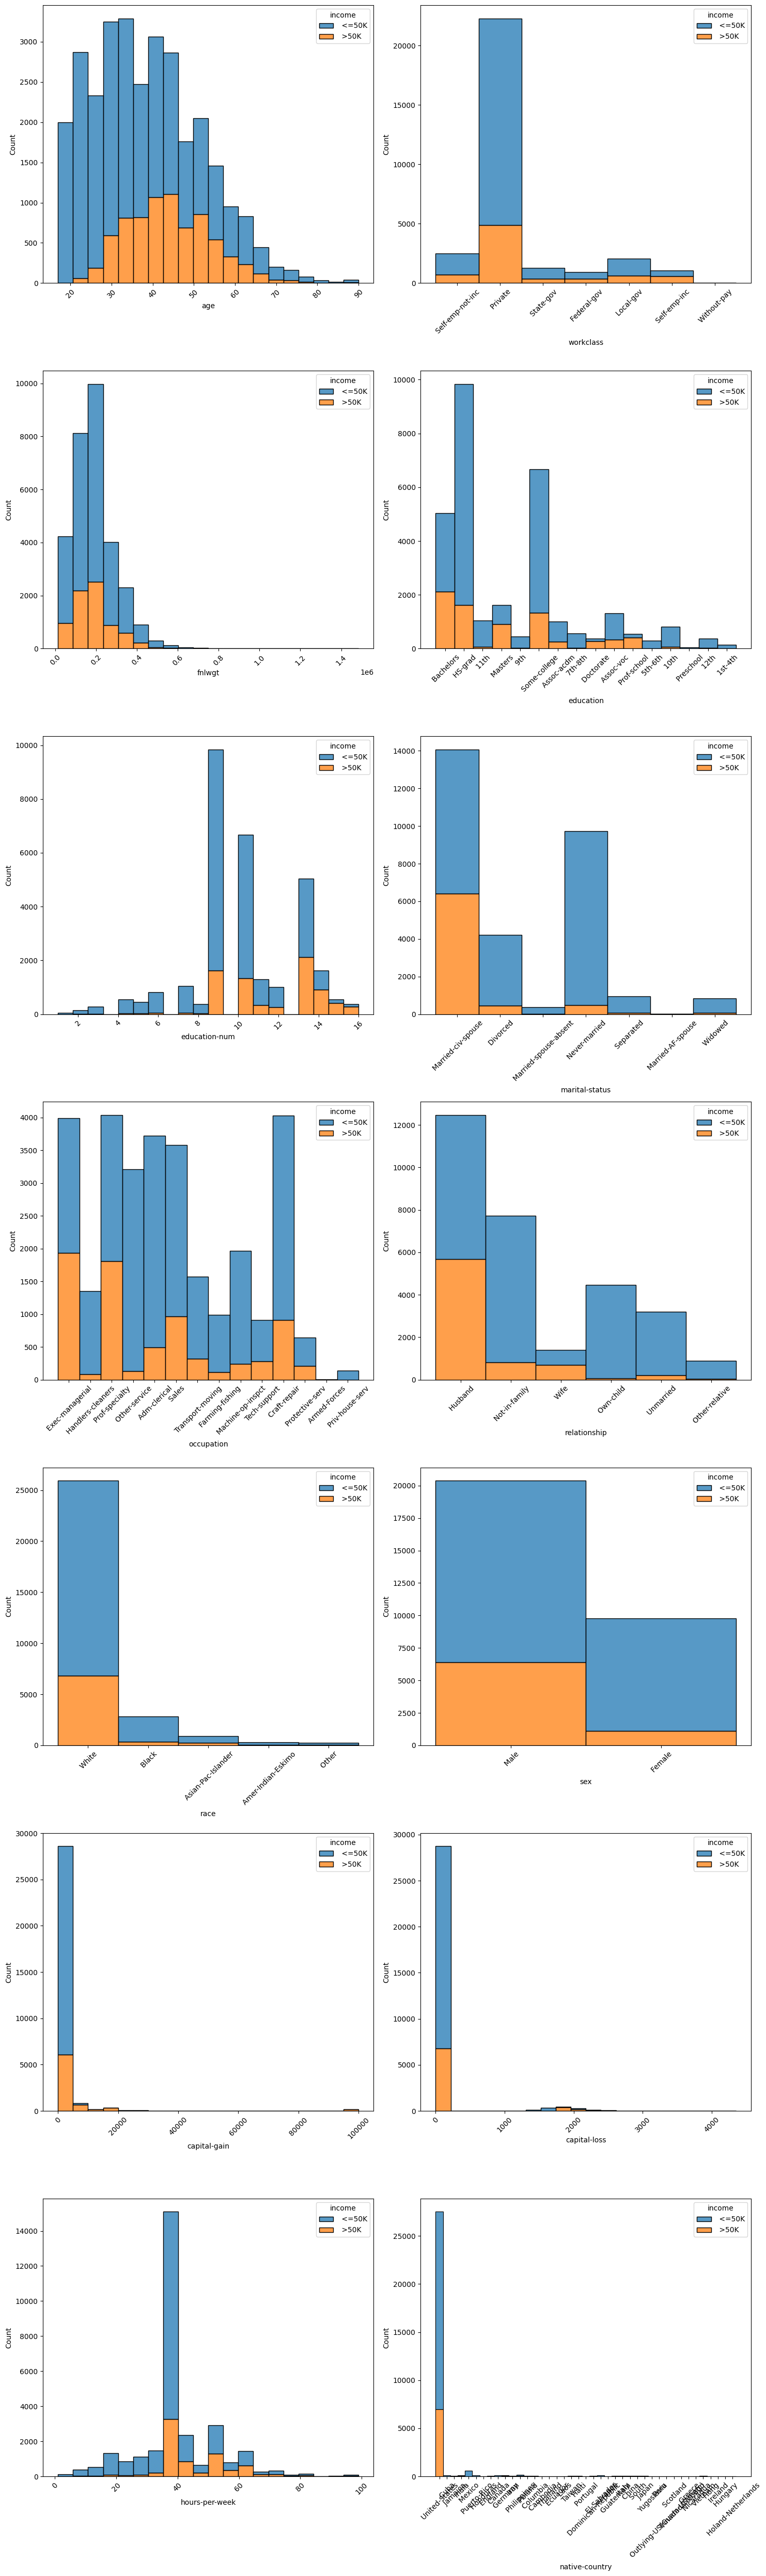

In [28]:
rows = 7
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(15,50))
columns_to_visualize = df_full.columns[:-1]

for index, column in enumerate(columns_to_visualize):
    sns.histplot(
        data=df_full,
        x=column,
        bins=20,
        ax=axes.flat[index],
        hue='income',
        multiple='stack'
    )
    axes.flat[index].tick_params(axis='x', rotation=45)

for i in range(len(columns_to_visualize), rows * cols):
    fig.delaxes(axes.flat[i])

plt.tight_layout()
plt.show()



This visualization shows the distribution of each feature in the dataset, highlighting differences between income groups (<=50K and >50K). It helps us identify patterns and relationships that are essential for data preprocessing and feature selection.

We can use most of that features for our task:

| **Feature**          | **Description**                                                                 |
|-----------------------|---------------------------------------------------------------------------------|
| `age`                | Higher income (`>50K`) is more frequent in individuals aged between 30-50 years. |
| `education-num`      | Higher education levels strongly correlate with earning `>50K`.                 |
| `marital-status`     | Married individuals, especially `Married-civ-spouse`, dominate the `>50K` category. |
| `occupation`         | Executive and professional occupations (`Exec-managerial`, `Prof-specialty`) are highly linked to `>50K`. |
| `relationship`       | Husbands are the most represented group in the `>50K` category.                 |
| `hours-per-week`     | Individuals working more than 40 hours per week are more likely to earn `>50K`.  |
| `capital-gain`       | Significant capital gains are a strong indicator of higher income.              |
| `capital-loss`       | Individuals with notable capital losses show higher representation in `>50K`.   |


# Preprocessing

## Encoding Categorical

In [29]:
categorical_columns = ['workclass', 'education', 'marital-status',
                       'occupation', 'relationship', 'race',
                       'sex', 'native-country', 'income']

for column in categorical_columns:
    print(f"Unique values in '{column}':")
    print(df_full[column].unique())
    print("-" * 50)

Unique values in 'workclass':
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
--------------------------------------------------
Unique values in 'education':
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
--------------------------------------------------
Unique values in 'marital-status':
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
--------------------------------------------------
Unique values in 'occupation':
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' Craft-repair'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
--------------------------------------------------
Un

In [30]:
df_encoded = df_full.copy()
df_encoded.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [31]:
education_mapping = {
    ' Preschool': 1, ' 1st-4th': 2, ' 5th-6th': 3, ' 7th-8th': 4,
    ' 9th': 5, ' 10th': 6, ' 11th': 7, ' 12th': 8, ' HS-grad': 9,
    ' Some-college': 10, ' Assoc-voc': 11, ' Assoc-acdm': 12,
    ' Bachelors': 13, ' Masters': 14, ' Doctorate': 15, ' Prof-school': 16
}
df_encoded['education'] = df_encoded['education'].map(education_mapping)
df_encoded.drop(columns=['education'], inplace=True)

df_encoded.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


I encoded the education categorical variable using manual encoding to preserve its natural order. Then, I dropped the education column.

In [32]:
label_encoder = LabelEncoder()
df_encoded['sex'] = label_encoder.fit_transform(df_encoded['sex']) # Male: 0, Female: 1
df_encoded['income'] = label_encoder.fit_transform(df_encoded['income']) # <=50K: 0, >50K: 1

df_encoded.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,United-States,0


I used label encoding to convert the binary categorical variables sex and income into numerical form. This ensures that `sex` is encoded as 0 for Male and 1 for Female, and `income` as 0 for <=50K and 1 for >50K.

In [33]:
categorical_columns = ['workclass', 'marital-status', 'occupation',
                       'relationship', 'race', 'native-country']
label_mappings = {}

label_encoder = LabelEncoder()
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
    # Store the mapping (category -> number)
    label_mappings[column] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

for column, mapping in label_mappings.items():
    print(f"Mapping for '{column}':")
    print(mapping)
    print("-" * 50)

Mapping for 'workclass':
{' Federal-gov': 0, ' Local-gov': 1, ' Private': 2, ' Self-emp-inc': 3, ' Self-emp-not-inc': 4, ' State-gov': 5, ' Without-pay': 6}
--------------------------------------------------
Mapping for 'marital-status':
{' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}
--------------------------------------------------
Mapping for 'occupation':
{' Adm-clerical': 0, ' Armed-Forces': 1, ' Craft-repair': 2, ' Exec-managerial': 3, ' Farming-fishing': 4, ' Handlers-cleaners': 5, ' Machine-op-inspct': 6, ' Other-service': 7, ' Priv-house-serv': 8, ' Prof-specialty': 9, ' Protective-serv': 10, ' Sales': 11, ' Tech-support': 12, ' Transport-moving': 13}
--------------------------------------------------
Mapping for 'relationship':
{' Husband': 0, ' Not-in-family': 1, ' Other-relative': 2, ' Own-child': 3, ' Unmarried': 4, ' Wife': 5}
--------------------------------------------

In this code, I apply label encoding to the categorical columns (`workclass`, `marital-status`, etc.) to convert their categories into numeric values. While encoding, I also store the mappings for each column (category → number) in a dictionary called `label_mappings`, which helps me understand the correspondence between original categories and their numeric representations. This ensures the encoding process is transparent and easily interpretable later.

In [34]:
df_encoded.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,4,83311,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,14,2,3,5,4,0,0,0,40,38,0


Now all the categorical features are encoded to numerical.

## Scaling

In [35]:
scaler = MinMaxScaler()

columns_to_scale = df_encoded.columns[:-1]
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

df_encoded.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.452055,0.666667,0.047277,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.0,0.0,0.122449,0.95,0
1,0.287671,0.333333,0.137244,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.0,0.0,0.397959,0.95,0
2,0.493151,0.333333,0.150212,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.0,0.0,0.397959,0.95,0
3,0.150685,0.333333,0.220703,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.0,0.0,0.397959,0.10,0
4,0.273973,0.333333,0.184109,0.866667,0.333333,0.230769,1.0,1.0,0.0,0.0,0.0,0.397959,0.95,0


I applied MinMax scaling to normalize all feature values to the range [0, 1], ensuring that no feature dominates due to its scale.

# Correlation

In [36]:
corr_mat = df_encoded.corr()

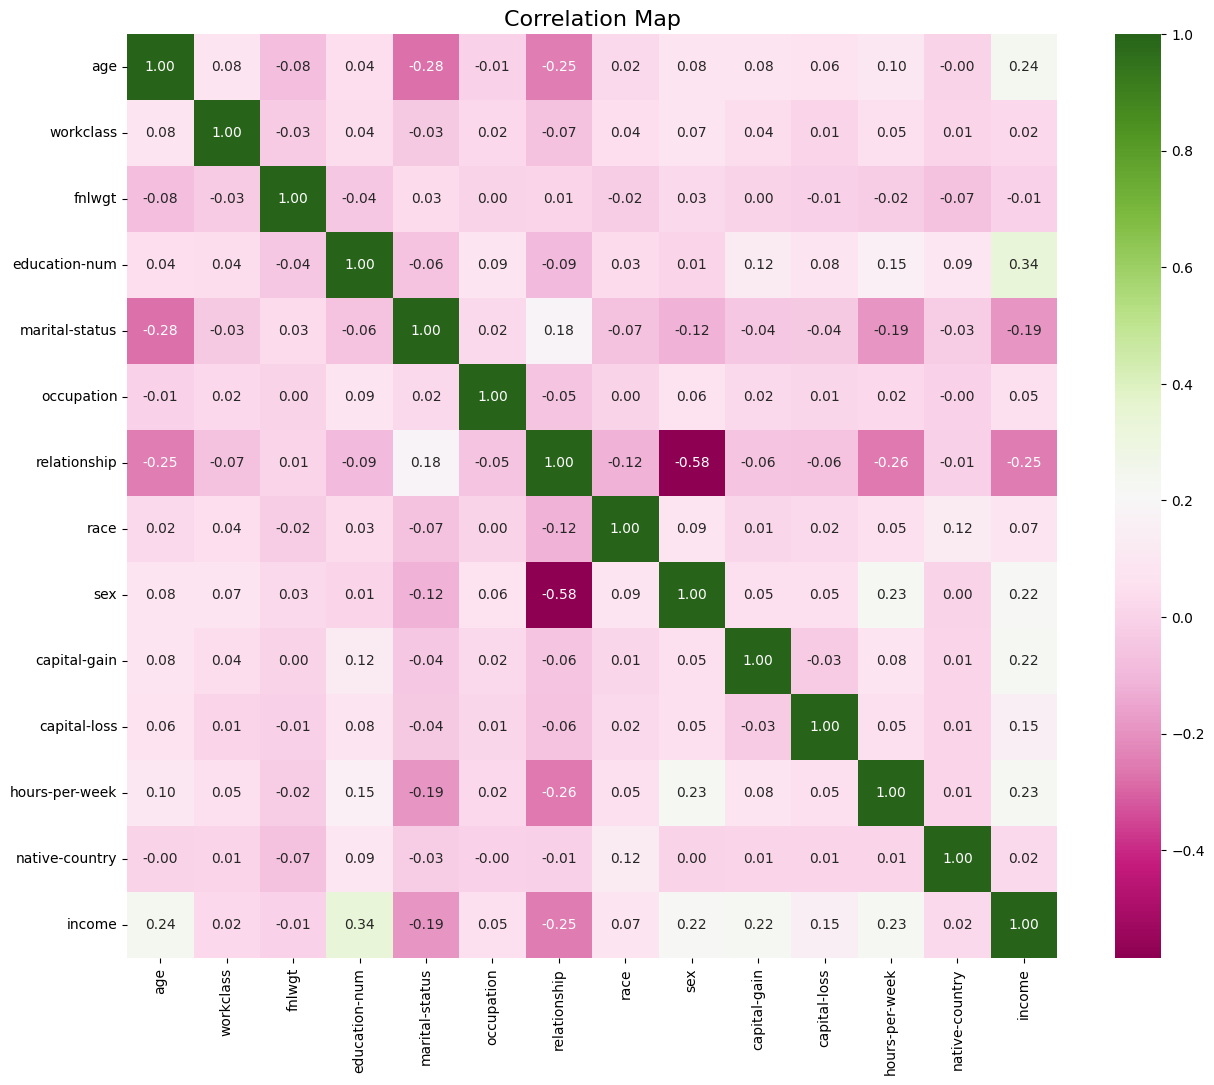

In [37]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr_mat, cmap="PiYG", annot=True, fmt=".2f")

plt.title("Correlation Map", fontsize=16)
plt.show()

From the correlation map, the following columns have very low or minimal correlation with the target variable `income`, and they can be considered for removal:

`fnlwgt` (-0.01) : represents sampling weights and shows no meaningful relationship with income

`native-country` (0.02) : adds little predictive value as most individuals are from the same country.

`workclass` (0.02): has a very minimal correlation with income, making it less useful for predictive modeling.

In [38]:
del df_encoded['fnlwgt']
del df_encoded['native-country']
del df_encoded['workclass']

In [39]:
df_encoded.head()

,age,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,0.452055,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.0,0.0,0.122449,0
1,0.287671,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.0,0.0,0.397959,0
2,0.493151,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.0,0.0,0.397959,0
3,0.150685,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.0,0.0,0.397959,0
4,0.273973,0.866667,0.333333,0.230769,1.0,1.0,0.0,0.0,0.0,0.397959,0


# Split

In [40]:
df_splited = df_encoded.copy()

In [41]:
X = df_splited.drop(columns=['income'])
y = df_splited['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21112, 10), (9049, 10), (21112,), (9049,))


I split the dataset into training and testing sets to prepare for machine learning model training and evaluation. The training set (70% of the data) is used to train the model, while the testing set (30% of the data) is reserved to evaluate the model's performance on unseen data.

# Classification Algorithms

I chose **F1-score** as the primary evaluation metric because it balances precision and recall, making it suitable for slightly imbalanced datasets. This ensures the model performs well by minimizing both false positives and false negatives, providing a more balanced assessment than accuracy alone.

## Decision Tree

In [25]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

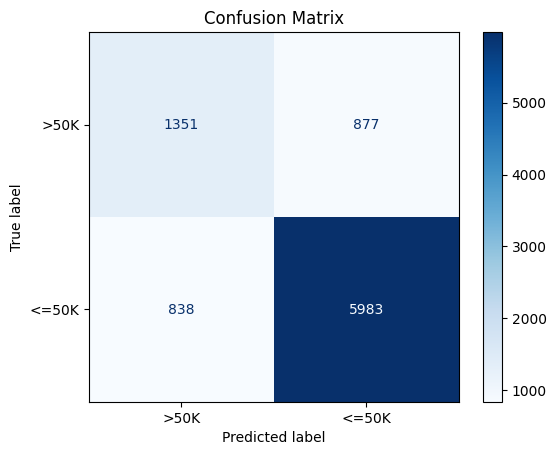

In [ ]:
cm_dtc = confusion_matrix(y_test, y_pred_dtc, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtc, display_labels=['>50K', '<=50K'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

The **confusion matrix** shows that the model **correctly predicted** 5,983 instances of <=50K and 1,351 instances of >50K, while **misclassifying** 838 and 877 instances, respectively.

This indicates that the **Decision Tree** performs better on the majority class (<=50K) but struggles slightly with the minority class (>50K).

In [ ]:
f1_dtc = f1_score(y_test, y_pred_dtc)
f1_dtc

0.6117274167987322

In [ ]:
class_report_dtc = classification_report(y_test, y_pred_dtc, target_names=['<=50K', '>50K'])
print(class_report_dtc)

              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.87      6821
        >50K       0.62      0.61      0.61      2228

    accuracy                           0.81      9049
   macro avg       0.74      0.74      0.74      9049
weighted avg       0.81      0.81      0.81      9049



### k-Fold Cross-Validation

I decided to make the stratified version for better handling of class imbalance

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dtc, X, y, cv=skf, scoring='f1')

In [ ]:
cv_scores.mean()

0.616363406070094

The Mean F1-Score indicates that the model achieves a moderate balance between Precision and Recall across all folds.

In [ ]:
cv_scores.std()

0.011037271467322876

The Standard Deviation shows that the model's performance is consistent across different data splits, suggesting it generalizes well.

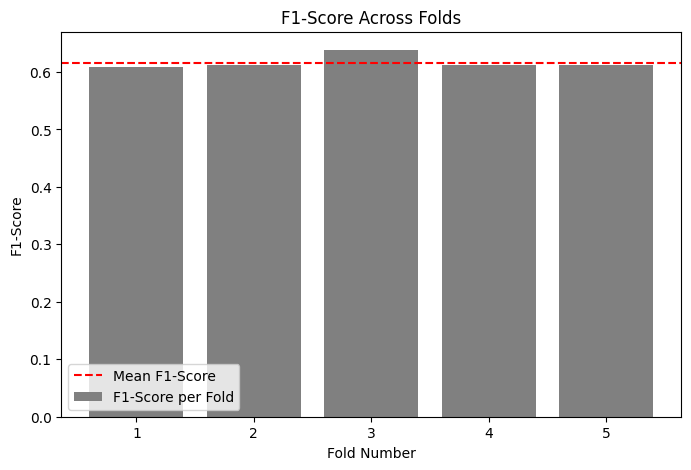

In [ ]:
folds = [1, 2, 3, 4, 5]
f1_scores = cv_scores

plt.figure(figsize=(8, 5))
plt.bar(folds, f1_scores, color='grey', label='F1-Score per Fold')
plt.axhline(y=np.mean(f1_scores), color='red', linestyle='--', label='Mean F1-Score')
plt.title("F1-Score Across Folds")
plt.xlabel("Fold Number")
plt.ylabel("F1-Score")
plt.xticks(folds)
plt.legend()
plt.show()

In [ ]:
cv_scores

array([0.60827917, 0.61178046, 0.63826864, 0.61208981, 0.61139896])

### Hyper-Parameters Tuning

#### ``max_depth``

The **max depth** defines the maximum number of levels in the tree, controlling its complexity and ability to capture patterns. Tuning this hyperparameter helps balance **overfitting** (too deep) and **underfitting** (too shallow), ensuring the model generalizes well to unseen data.

In [93]:
scores_global = []
for x in np.arange(2,25):
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  scores=[]
  for train_index,test_index in skf.split(X,y):
      X_train,X_test = X.iloc[train_index,:],X.iloc[test_index,:]
      y_train,y_test = y.iloc[train_index],y.iloc[test_index]

      dtc = DecisionTreeClassifier(max_depth=x,random_state=42)
      dtc.fit(X_train,y_train)
      y_pred=dtc.predict(X_test)

      scores.append(f1_score(y_test,y_pred))
  scores_global.append((x,np.mean(scores)))

scores_global[:10]

[(2, 0.5382188948764092),
 (3, 0.590631064424579),
 (4, 0.6232547187683066),
 (5, 0.6242788597071814),
 (6, 0.6462382892646735),
 (7, 0.6506634020818411),
 (8, 0.6543244081653216),
 (9, 0.6553912184120144),
 (10, 0.6598614564221629),
 (11, 0.6735360289243518)]

In [94]:
df_res = pd.DataFrame.from_records(scores_global, columns=['max_depth', 'f1'])
df_res.head()

,max_depth,f1
0,2,0.538219
1,3,0.590631
2,4,0.623255
3,5,0.624279
4,6,0.646238


<Axes: xlabel='max_depth', ylabel='f1'>

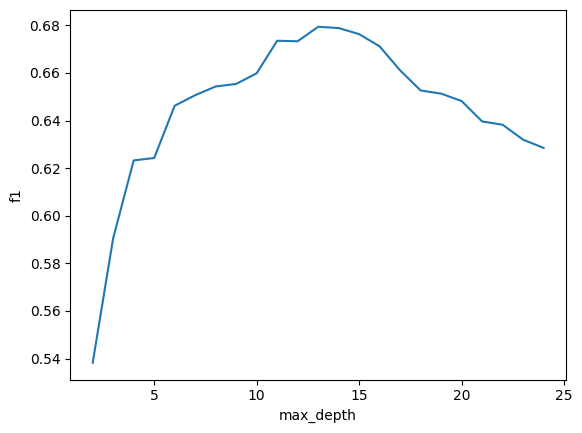

In [95]:
sns.lineplot(data = df_res, x='max_depth', y='f1')

In [96]:
df_res.sort_values(by='f1', ascending=False).head(5)

,max_depth,f1
11,13,0.679411
12,14,0.678877
13,15,0.676328
9,11,0.673536
10,12,0.673320


In [97]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_dtc = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtc = DecisionTreeClassifier(max_depth=13, random_state=42)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    scores_dtc.append(f1_score(y_test, y_pred))

scores_dtc

[0.6792058516196448,
 0.6704830053667263,
 0.6986056489095459,
 0.6631908237747653,
 0.6855707106963388]

In [99]:
np.mean(scores_dtc)

0.6794112080734043

After tuning the **max depth** hyperparameter, a value of **13** provided the best result with an F1-score of **0.679411**. This indicates that a depth of 13 balances complexity and generalization effectively for this dataset.

#### ``criterion``

The **criterion** determines how the decision tree evaluates splits at each node. The two options are:


*   **Gini** - measures the probability of incorrect classification, favoring balanced splits.
*   **Entropy** - uses information gain to measure the uncertainty or randomness, aiming to maximize information gained with each split.



In [ ]:
criteria = ['gini', 'entropy']
scores_criterion = []

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

for criterion in criteria:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y[train_index], y[test_index]

        dtc = DecisionTreeClassifier(criterion=criterion, random_state=42)
        dtc.fit(X_train, y_train)
        y_pred = dtc.predict(X_test)
        scores.append(f1_score(y_test, y_pred))

    scores_criterion.append((criterion, np.mean(scores)))

criterion_df = pd.DataFrame(scores_criterion, columns=['criterion', 'f1'])
criterion_df

,criterion,f1
0,gini,0.616363
1,entropy,0.618018


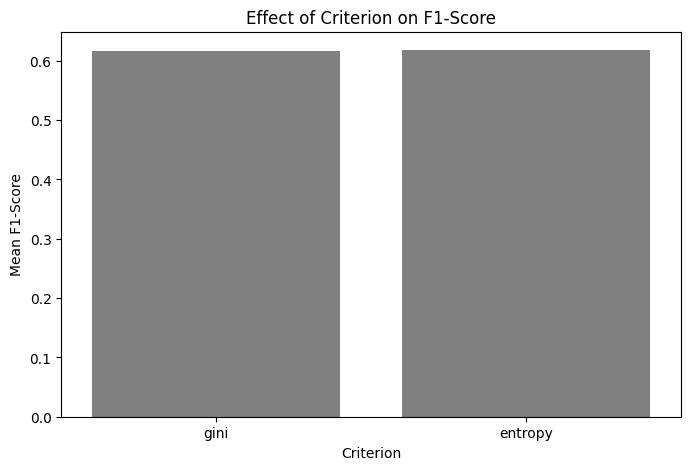

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=criterion_df, x='criterion', y='f1', color='grey')
plt.title("Effect of Criterion on F1-Score")
plt.xlabel("Criterion")
plt.ylabel("Mean F1-Score")
plt.show()

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_dtc = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    scores_dtc.append(f1_score(y_test, y_pred))

scores_dtc

[0.6163265306122448,
 0.6115035317860746,
 0.6277220877981334,
 0.6128695652173913,
 0.621668397369332]

After tuning, the **``entropy`` criterion** achieved an F1-score of **0.618018**, indicating its effectiveness for this dataset.

#### ``min_samples_split``

The **`min_samples_split`** parameter determines the minimum number of samples required to split an internal node. It controls the tree's growth, where larger values prevent overfitting by restricting splits on small subsets of data.

In [ ]:
scores_global = []

for x in np.arange(2,50):
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  scores=[]
  for train_index,test_index in skf.split(X,y):
      X_train,X_test = X.iloc[train_index,:],X.iloc[test_index,:]
      y_train,y_test = y.iloc[train_index],y.iloc[test_index]

      dtc = DecisionTreeClassifier(min_samples_split=x,random_state=42)
      dtc.fit(X_train,y_train)
      y_pred=dtc.predict(X_test)

      scores.append(f1_score(y_test,y_pred))
  scores_global.append((x,np.mean(scores)))

scores_global[:10]

[(2, 0.616363406070094),
 (3, 0.6158686747036614),
 (4, 0.6218324793435464),
 (5, 0.6208259830485875),
 (6, 0.628706346743872),
 (7, 0.6292769034179899),
 (8, 0.6341181340349563),
 (9, 0.6359042026522739),
 (10, 0.6388973777179037),
 (11, 0.6399117398676033)]

In [ ]:
df_res = pd.DataFrame.from_records(scores_global, columns=['min_samples_split', 'f1'])
df_res.head()

,min_samples_split,f1
0,2,0.616363
1,3,0.615869
2,4,0.621832
3,5,0.620826
4,6,0.628706


<Axes: xlabel='min_samples_split', ylabel='f1'>

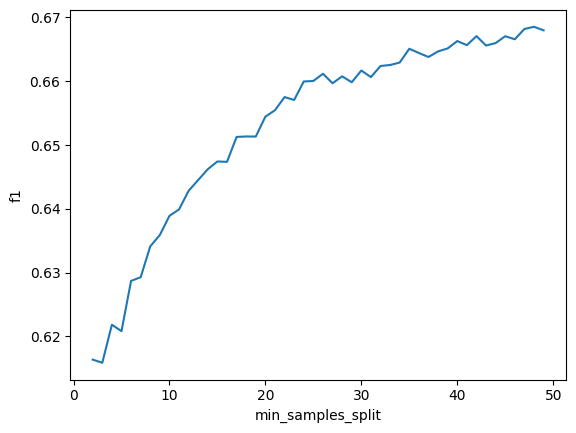

In [ ]:
sns.lineplot(data = df_res, x='min_samples_split', y='f1')

In [ ]:
df_res.sort_values(by='f1', ascending=False).head()

,min_samples_split,f1
46,48,0.668537
45,47,0.668194
47,49,0.667982
40,42,0.667073
43,45,0.667057


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_dtc = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtc = DecisionTreeClassifier(min_samples_split=48, random_state=42)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    scores_dtc.append(f1_score(y_test, y_pred))

scores_dtc

[0.6666666666666666,
 0.6618808327351041,
 0.6771092915628337,
 0.6569555717407137,
 0.6800718132854578]

After tuning, a value of **48** provided the best F1-score of **0.668537**, balancing the tree's depth and generalization ability.

#### ``min_samples_leaf``

The **`min_samples_leaf`** parameter specifies the minimum number of samples required to be at a leaf node. It ensures that leaf nodes are not created from overly small subsets, preventing overfitting and improving the model's stability.

In [ ]:
scores_global = []

for x in np.arange(2,21):
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  scores=[]
  for train_index,test_index in skf.split(X,y):
      X_train,X_test = X.iloc[train_index,:],X.iloc[test_index,:]
      y_train,y_test = y.iloc[train_index],y.iloc[test_index]

      dtc = DecisionTreeClassifier(min_samples_leaf=x,random_state=42)
      dtc.fit(X_train,y_train)
      y_pred=dtc.predict(X_test)

      scores.append(f1_score(y_test,y_pred))
  scores_global.append((x,np.mean(scores)))

scores_global[:10]

[(2, 0.6223219933814929),
 (3, 0.6385090866952072),
 (4, 0.6417332947241254),
 (5, 0.6523944724530942),
 (6, 0.6523129857286298),
 (7, 0.6586137059813677),
 (8, 0.6575650296693798),
 (9, 0.6622057682716034),
 (10, 0.6605998331487851),
 (11, 0.6607606156428816)]

In [ ]:
df_res = pd.DataFrame.from_records(scores_global, columns=['min_samples_leaf', 'f1'])
df_res.head()

,min_samples_leaf,f1
0,2,0.622322
1,3,0.638509
2,4,0.641733
3,5,0.652394
4,6,0.652313


<Axes: xlabel='min_samples_leaf', ylabel='f1'>

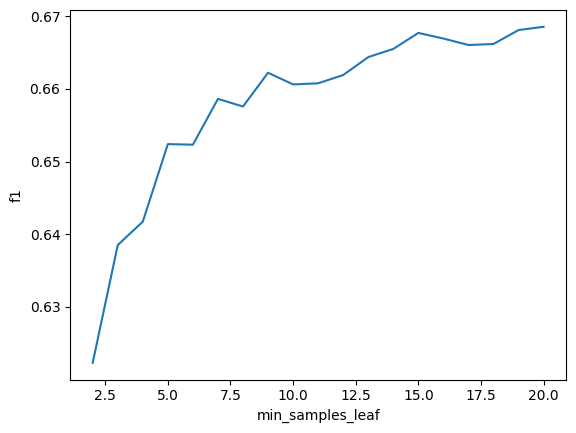

In [ ]:
sns.lineplot(data = df_res, x='min_samples_leaf', y='f1')

In [ ]:
df_res.sort_values(by='f1', ascending=False).head()

,min_samples_leaf,f1
18,20,0.668528
17,19,0.668080
13,15,0.667685
14,16,0.666910
16,18,0.666162


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_dtc = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtc = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    scores_dtc.append(f1_score(y_test, y_pred))

scores_dtc

[0.6714593817397556,
 0.6673873873873873,
 0.6736765772298767,
 0.6558704453441295,
 0.6742479823917829]

After tuning, a value of **20** provided the best F1-score of **0.668528**, indicating an optimal balance between model complexity and generalization.

#### ``max_features``

The **`max_features`** parameter controls the number of features considered when looking for the best split at each node. Using **None** means all features are considered, while smaller values can reduce overfitting and improve computational efficiency.

In [ ]:
max_features_values = [None, 'sqrt', 'log2']
scores_max_features = []

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

for max_features in max_features_values:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y[train_index], y[test_index]

        dtc = DecisionTreeClassifier(max_features=max_features, random_state=42)
        dtc.fit(X_train, y_train)

        y_pred = dtc.predict(X_test)
        scores.append(f1_score(y_test, y_pred))

    scores_max_features.append((max_features if max_features else "None", np.mean(scores)))

max_features_df = pd.DataFrame(scores_max_features, columns=['max_features', 'f1'])
max_features_df

,max_features,f1
0,None,0.616363
1,sqrt,0.615059
2,log2,0.615059


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_dtc = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtc = DecisionTreeClassifier(max_features=None , random_state=42)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    scores_dtc.append(f1_score(y_test, y_pred))

scores_dtc

[0.6082791652411905,
 0.6117804551539491,
 0.6382686362074889,
 0.6120898100172711,
 0.6113989637305699]

After tuning, using **`None`** provided an F1-score of **0.616363**, indicating that considering all features worked best for this dataset.

### Result

In [100]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_dtc = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtc = DecisionTreeClassifier(max_depth=13, criterion='entropy', min_samples_split=48, min_samples_leaf=20, max_features=None , random_state=42)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    scores_dtc.append(f1_score(y_test, y_pred))

scores_dtc

[0.6805251641137856,
 0.6829446064139941,
 0.6820343944383461,
 0.6633093525179856,
 0.6833948339483394]

In [101]:
np.mean(scores_dtc)

0.6784416702864903

| **Decision Tree Tuning Results** | **Best Value** | **F1-Score** |
|-----------------------------------|----------------|---------------|
| No Parameters Tuned              | -              | 0.616363      |
| Max Depth                        | 13             | 0.679411      |
| Criterion                        | Entropy        | 0.618018      |
| Min Samples Split                | 48             | 0.668537      |
| Min Samples Leaf                 | 20             | 0.668528      |
| Max Features                     | None           | 0.616363      |
| Combined Tuning                  | -      | 0.678442      |


## Random Forest

In [ ]:
X = df_splited.drop(columns=['income'])
y = df_splited['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21112, 10), (9049, 10), (21112,), (9049,))

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

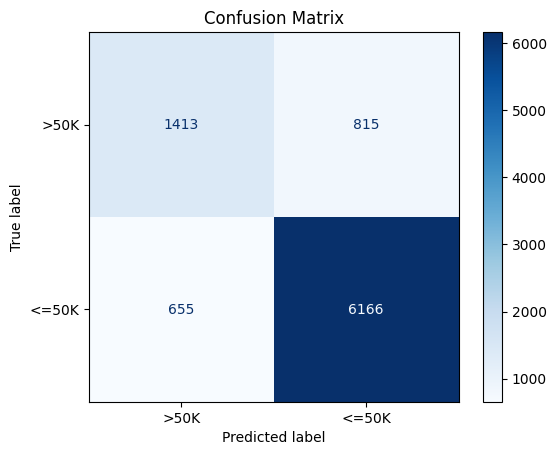

In [ ]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=['>50K', '<=50K'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

The confusion matrix shows that the model **correctly classified** 6,166 instances of <=50K and 1,413 instances of >50K, while **misclassifying** 655 and 815 instances, respectively. This indicates improved performance compared to the Decision Tree, especially in classifying the minority class (>50K).

In [ ]:
f1_rfc = f1_score(y_test, y_pred_rfc)
f1_rfc

0.6578212290502793

In [ ]:
class_report_rfc = classification_report(y_test, y_pred_rfc, target_names=['<=50K', '>50K'])
print(class_report_rfc)

              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      6821
        >50K       0.68      0.63      0.66      2228

    accuracy                           0.84      9049
   macro avg       0.78      0.77      0.78      9049
weighted avg       0.83      0.84      0.84      9049



### k-Fold Cross-Validation

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rfc, X, y, cv=skf, scoring='f1')

In [ ]:
cv_scores.mean()

0.6617590403338569

In [ ]:
cv_scores.std()

0.006689947563836813

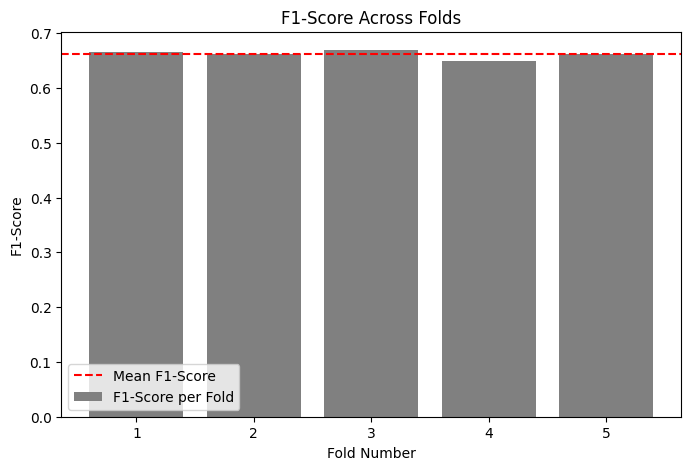

In [ ]:
folds = [1, 2, 3, 4, 5]
f1_scores = cv_scores

plt.figure(figsize=(8, 5))
plt.bar(folds, f1_scores, color='grey', label='F1-Score per Fold')
plt.axhline(y=np.mean(f1_scores), color='red', linestyle='--', label='Mean F1-Score')
plt.title("F1-Score Across Folds")
plt.xlabel("Fold Number")
plt.ylabel("F1-Score")
plt.xticks(folds)
plt.legend()
plt.show()

In [ ]:
cv_scores

array([0.66548673, 0.66202576, 0.66927732, 0.64940669, 0.66259871])

### Hyper-Parameters Tuning

#### ``n-estimators``

 The **`n_estimators`** parameter defines the number of trees in the forest. More trees improve stability and performance but increase computation time.

In [ ]:
scores_global = []

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

for x in np.arange(10,300,50):
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  scores=[]
  for train_index,test_index in skf.split(X,y):
      X_train,X_test = X.iloc[train_index,:],X.iloc[test_index,:]
      y_train,y_test = y.iloc[train_index],y.iloc[test_index]

      rdc = RandomForestClassifier(n_estimators=x,random_state=42)
      rdc.fit(X_train,y_train)
      y_pred=rdc.predict(X_test)

      scores.append(f1_score(y_test,y_pred))
  scores_global.append((x,np.mean(scores)))

scores_global[:10]

[(10, 0.6495798588980242),
 (60, 0.6611362740953945),
 (110, 0.6628499758916474),
 (160, 0.6632963730605861),
 (210, 0.6630102195275313),
 (260, 0.6629818821270497)]

In [ ]:
df_res = pd.DataFrame.from_records(scores_global, columns=['n_estimators', 'f1'])
df_res.head()

,n_estimators,f1
0,10,0.649580
1,60,0.661136
2,110,0.662850
3,160,0.663296
4,210,0.663010


<Axes: xlabel='n_estimators', ylabel='f1'>

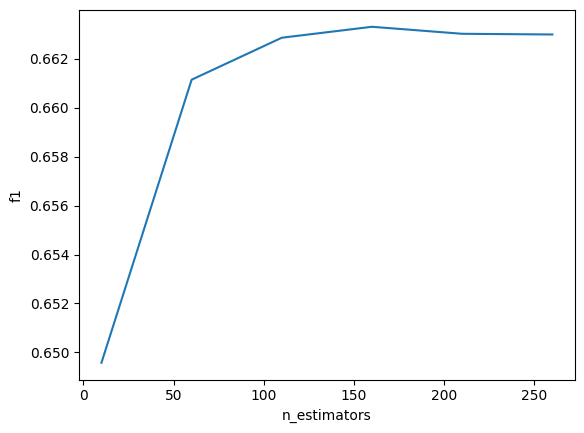

In [ ]:
sns.lineplot(data = df_res, x='n_estimators', y='f1')

In [ ]:
df_res.sort_values(by='f1', ascending=False).head(5)

,n_estimators,f1
3,160,0.663296
4,210,0.663010
5,260,0.662982
2,110,0.662850
1,60,0.661136


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rfc = RandomForestClassifier(n_estimators=160, random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

scores

[0.6687830687830688,
 0.6640953716690042,
 0.6742613029547881,
 0.6474612891609651,
 0.6618808327351041]

After tuning, **160** trees provided the best F1-score of **0.663296**, showing a slight improvement over the base model.

#### ``max_depth``

The max_depth parameter limits the depth of each tree, controlling its complexity. A deeper tree captures more details but may overfit, while a shallow tree generalizes better.

In [ ]:
scores_global = []
for x in np.arange(2,50):
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  scores=[]
  for train_index,test_index in skf.split(X,y):
      X_train,X_test = X.iloc[train_index,:],X.iloc[test_index,:]
      y_train,y_test = y.iloc[train_index],y.iloc[test_index]

      rfc = RandomForestClassifier(max_depth=x,random_state=42)
      rfc.fit(X_train,y_train)
      y_pred=rfc.predict(X_test)

      scores.append(f1_score(y_test,y_pred))
  scores_global.append((x,np.mean(scores)))

scores_global[:10]

[(2, 0.33982114919697926),
 (3, 0.5856341291632365),
 (4, 0.6087917674216571),
 (5, 0.6319349388904605),
 (6, 0.6412721716212857),
 (7, 0.6443918327969009),
 (8, 0.6448214606025628),
 (9, 0.6483803624668549),
 (10, 0.6554211699811756),
 (11, 0.664815624230645)]

In [ ]:
df_res = pd.DataFrame.from_records(scores_global, columns=['max_depth', 'f1'])
df_res.head()

,max_depth,f1
0,2,0.339821
1,3,0.585634
2,4,0.608792
3,5,0.631935
4,6,0.641272


<Axes: xlabel='max_depth', ylabel='f1'>

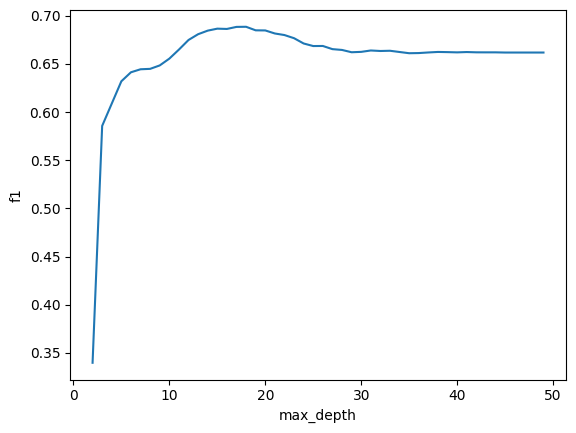

In [ ]:
sns.lineplot(data = df_res, x='max_depth', y='f1')

In [ ]:
df_res.sort_values(by='f1', ascending=False).head(5)

,max_depth,f1
16,18,0.688484
15,17,0.688364
13,15,0.686537
14,16,0.686232
17,19,0.684803


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rfc = RandomForestClassifier(max_depth=18, random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

scores

[0.6826434277414669,
 0.6912509038322487,
 0.6926184355490268,
 0.6790799561883899,
 0.6968259759211967]

After tuning, a depth of **18** shows the best F1-score of **0.688484**, achieving a balance between complexity and generalization.

#### ``max_leaf_nodes``

The **`max_leaf_nodes`** parameter limits the maximum number of leaf nodes in each tree, controlling the model's capacity to capture patterns and reducing overfitting.

In [121]:
scores_global = []
for x in np.arange(50,1000,50):
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  scores=[]
  for train_index,test_index in skf.split(X,y):
      X_train,X_test = X.iloc[train_index,:],X.iloc[test_index,:]
      y_train,y_test = y.iloc[train_index],y.iloc[test_index]

      rfc = RandomForestClassifier(max_leaf_nodes=x,random_state=42)
      rfc.fit(X_train,y_train)
      y_pred=rfc.predict(X_test)

      scores.append(f1_score(y_test,y_pred))
  scores_global.append((x,np.mean(scores)))

scores_global[:10]

[(50, 0.6474093471301506),
 (100, 0.6690671014104571),
 (150, 0.6778947268622338),
 (200, 0.6821278585202938),
 (250, 0.6844129528548905),
 (300, 0.684831946211232),
 (350, 0.6875518918138015),
 (400, 0.6883771254195639),
 (450, 0.6881965026943349),
 (500, 0.6897383765245257)]

In [122]:
df_res = pd.DataFrame.from_records(scores_global, columns=['max_leaf_nodes', 'f1'])
df_res.head()

,max_leaf_nodes,f1
0,50,0.647409
1,100,0.669067
2,150,0.677895
3,200,0.682128
4,250,0.684413


<Axes: xlabel='max_leaf_nodes', ylabel='f1'>

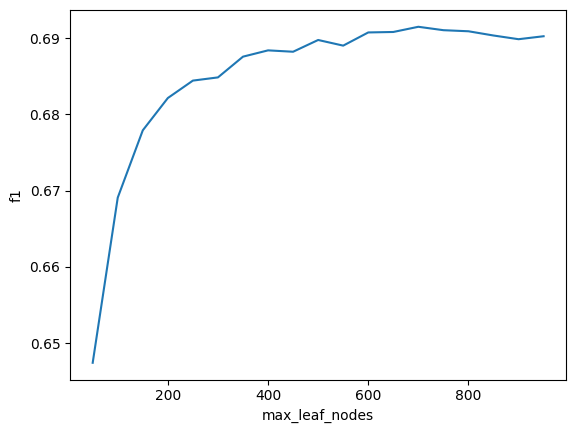

In [123]:
sns.lineplot(data = df_res, x='max_leaf_nodes', y='f1')

In [124]:
df_res.sort_values(by='f1', ascending=False).head(5)

,max_leaf_nodes,f1
13,700,0.691470
14,750,0.691023
15,800,0.690881
12,650,0.690788
11,600,0.690727


In [126]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rfc = RandomForestClassifier(max_leaf_nodes=700, random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

scores

[0.6897305171158048,
 0.6956207021353601,
 0.695780903034789,
 0.6779911373707533,
 0.6982248520710059]

After tuning, **700** leaf nodes achieved the best F1-score of **0.691470**, indicating a balance between model complexity and performance.

### Result

In [127]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rfc = RandomForestClassifier(n_estimators=160, max_depth=18, max_leaf_nodes=700, random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

scores

[0.6886205634833517,
 0.6895795246800731,
 0.6928251121076233,
 0.6753343239227341,
 0.6925351071692535]

In [128]:
np.mean(scores)

0.6877789262726071

| **Random Forest Tuning Results** | **Best Value** | **F1-Score** |
|-----------------------------------|----------------|---------------|
| No Parameters Tuned              | -              | 0.661759      |
| n_estimators                     | 160            | 0.663296      |
| max_depth                        | 18             | 0.688484      |
| max_leaf_nodes                   | 700             | 0.691470      |
| Combined Tuning                  | -       | 0.687779      |


## Multi-Layer Perceptron (MLP)

In [42]:
X = df_splited.drop(columns=['income'])
y = df_splited['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21112, 10), (9049, 10), (21112,), (9049,))

In [43]:
mlp = MLPClassifier(random_state=42, max_iter=500)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

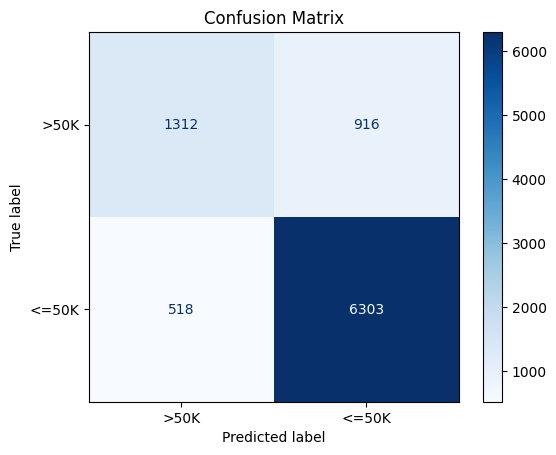

In [44]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=['>50K', '<=50K'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

The confusion matrix shows that the MLP model **correctly classified** 6,303 instances of <=50K and 1,312 instances of >50K, while **misclassifying** 518 and 916 instances, respectively. This indicates strong performance, with notable improvement in correctly classifying the minority class (>50K).

In [45]:
f1_mlp = f1_score(y_test, y_pred_mlp)
f1_mlp

0.6466239526860522

In [46]:
class_report_mlp = classification_report(y_test, y_pred_mlp, target_names=['<=50K', '>50K'])
print(class_report_mlp)

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90      6821
        >50K       0.72      0.59      0.65      2228

    accuracy                           0.84      9049
   macro avg       0.80      0.76      0.77      9049
weighted avg       0.83      0.84      0.84      9049



### k-Fold Cross-Validation

In [32]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(mlp, X, y, cv=skf, scoring='f1')

In [33]:
cv_scores.mean()

0.6545727723028589

In [34]:
cv_scores.std()

0.010074157542139214

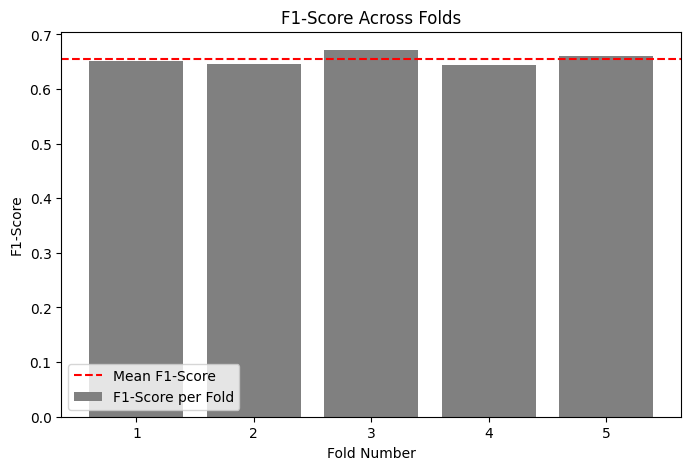

In [35]:
folds = [1, 2, 3, 4, 5]
f1_scores = cv_scores

plt.figure(figsize=(8, 5))
plt.bar(folds, f1_scores, color='grey', label='F1-Score per Fold')
plt.axhline(y=np.mean(f1_scores), color='red', linestyle='--', label='Mean F1-Score')
plt.title("F1-Score Across Folds")
plt.xlabel("Fold Number")
plt.ylabel("F1-Score")
plt.xticks(folds)
plt.legend()
plt.show()

In [36]:
cv_scores

array([0.65118022, 0.64628821, 0.67141251, 0.64391691, 0.66006601])

### Hyper-Parameters Tuning

#### ``max_iter``

The **`max_iter`** parameter specifies the maximum number of iterations (epochs) the optimization algorithm runs during training. Increasing max_iter allows the model more time to converge but may not improve performance if the model has already converged.

In [37]:
scores_global = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for x in np.arange(340,500,30):
  scores=[]
  for train_index,test_index in skf.split(X,y):
      X_train,X_test = X.iloc[train_index,:],X.iloc[test_index,:]
      y_train,y_test = y.iloc[train_index],y.iloc[test_index]

      mlp = MLPClassifier(max_iter=x,random_state=42)
      mlp.fit(X_train,y_train)
      y_pred=mlp.predict(X_test)

      scores.append(f1_score(y_test,y_pred))
  scores_global.append((x,np.mean(scores)))

scores_global[:10]

[(340, 0.6545727723028589),
 (370, 0.6545727723028589),
 (400, 0.6545727723028589),
 (430, 0.6545727723028589),
 (460, 0.6545727723028589),
 (490, 0.6545727723028589)]

In [38]:
df_res = pd.DataFrame.from_records(scores_global, columns=['max_iter', 'f1'])
df_res.head()

,max_iter,f1
0,340,0.654573
1,370,0.654573
2,400,0.654573
3,430,0.654573
4,460,0.654573


<Axes: xlabel='max_iter', ylabel='f1'>

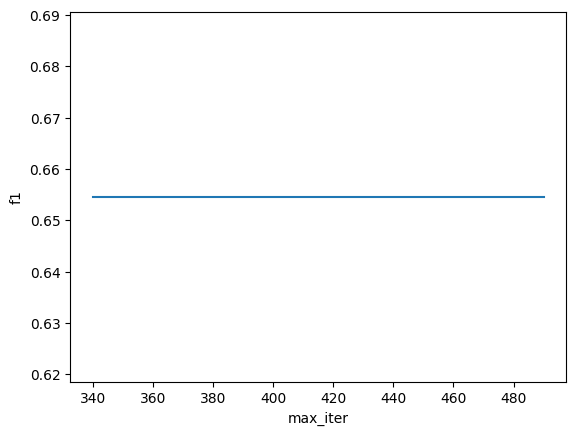

In [39]:
sns.lineplot(data = df_res, x='max_iter', y='f1')

These results show that the model converged before reaching 340 iterations, with the best F1-score remaining at **0.654573**, making further increases in max_iter unnecessary.

#### ``hidden_layer_sizes``

The **`hidden_layer_sizes`** parameter defines the number and size of hidden layers in the neural network. Each tuple element represents the number of neurons in a layer, allowing the model to capture complex patterns. Larger or deeper networks can increase the model's capacity but may lead to overfitting if not tuned carefully.

In [41]:
scores_global = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

hidden_layer_sizes_values = [(50,), (100,), (50, 50), (100, 50), (100, 50, 25)]

for x in hidden_layer_sizes_values:
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        mlp = MLPClassifier(hidden_layer_sizes=x, random_state=42, max_iter=370)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)

        scores.append(f1_score(y_test, y_pred))

    scores_global.append((x, np.mean(scores)))

scores_global[:10]

[((50,), 0.6505235712038951),
 ((100,), 0.6545727723028589),
 ((50, 50), 0.6429449830563773),
 ((100, 50), 0.6711360585110073),
 ((100, 50, 25), 0.6746358648365189)]

In [42]:
df_res = pd.DataFrame.from_records(scores_global, columns=['hidden_layer_sizes', 'f1'])
df_res.head()

,hidden_layer_sizes,f1
0,"(50,)",0.650524
1,"(100,)",0.654573
2,"(50, 50)",0.642945
3,"(100, 50)",0.671136
4,"(100, 50, 25)",0.674636


In [44]:
df_res.sort_values(by='f1', ascending=False).head(5)

,hidden_layer_sizes,f1
4,"(100, 50, 25)",0.674636
3,"(100, 50)",0.671136
1,"(100,)",0.654573
0,"(50,)",0.650524
2,"(50, 50)",0.642945


In [47]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mlp = MLPClassifier(hidden_layer_sizes=(100,50,25), random_state=42, max_iter=370)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

scores

[0.6751286449399657,
 0.6651982378854625,
 0.6888239590942293,
 0.6490963855421686,
 0.6949320967207685]

After tuning, the architecture **(100, 20, 25)** achieved the best F1-score of **0.674636**, indicating this configuration balances model complexity and performance effectively.

#### ``activation``

The activation function defines how neurons in the hidden layers process inputs and introduce non-linearity, enabling the network to learn complex patterns.

identity: A linear function that outputs the input as-is, suitable for simple

*   **`identity`** A linear function that outputs the input as-is, suitable for simple linear tasks.
*   **`logistic`** A sigmoid function that maps outputs between 0 and 1, ideal for binary classification.
*   **`tanh`** Maps outputs between -1 and 1, centering data around zero, effective for moderately complex tasks.
*   **`relu`** Outputs positive values directly and zero otherwise, widely used for deep networks due to its efficiency.

In [48]:
activation_values = ['identity', 'logistic', 'tanh', 'relu']

scores_activation = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for activation in activation_values:
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        mlp = MLPClassifier(activation=activation, random_state=42, max_iter=500)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        scores.append(f1_score(y_test, y_pred))

    scores_activation.append((activation, np.mean(scores)))

print(scores_activation)

[('identity', 0.5481715224123022), ('logistic', 0.6345828342206952), ('tanh', 0.639926945160301), ('relu', 0.6545727723028589)]


In [50]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mlp = MLPClassifier(activation='relu', random_state=42, max_iter=500)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

scores

[0.6511802173098539,
 0.6462882096069869,
 0.6714125140502061,
 0.6439169139465876,
 0.6600660066006601]

In [52]:
np.mean(scores), np.min(scores), np.max(scores)

(0.6545727723028589, 0.6439169139465876, 0.6714125140502061)

The **`relu`** activation function achieved an F1-score of **0.654573**, demonstrating its effectiveness for this dataset and task.

#### ``learning_rate_init``

The **`learning_rate_init`** parameter specifies the initial learning rate for the optimization algorithm. It controls the size of the weight updates during training, where smaller values improve stability but may slow convergence, and larger values speed up training but risk overshooting.

In [59]:
learning_rate_init_values = [0.0001, 0.001, 0.01, 0.1]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_learning_rate_init = []

for lr_init in learning_rate_init_values:
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        mlp = MLPClassifier(learning_rate_init=lr_init, random_state=42, max_iter=500)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)

        scores.append(f1_score(y_test, y_pred))

    scores_learning_rate_init.append((lr_init, np.mean(scores)))

scores_learning_rate_init

[(0.0001, 0.6373054898302306),
 (0.001, 0.6545727723028589),
 (0.01, 0.6621369719548473),
 (0.1, 0.6093572551700653)]

In [60]:
learning_rate_init_df = pd.DataFrame(scores_learning_rate_init, columns=['learning_rate_init', 'f1'])
learning_rate_init_df

,learning_rate_init,f1
0,0.0001,0.637305
1,0.0010,0.654573
2,0.0100,0.662137
3,0.1000,0.609357


<Axes: xlabel='learning_rate_init', ylabel='f1'>

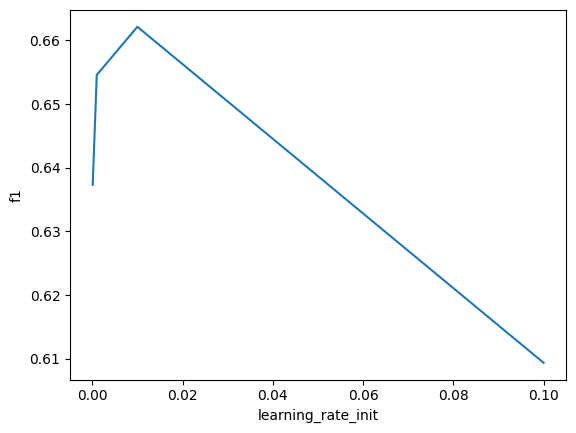

In [69]:
sns.lineplot(data = learning_rate_init_df, x='learning_rate_init', y='f1')

In [67]:
learning_rate_init_df = learning_rate_init_df.sort_values(by='f1', ascending=False)
learning_rate_init_df.head()

,learning_rate_init,f1
2,0.0100,0.662137
1,0.0010,0.654573
0,0.0001,0.637305
3,0.1000,0.609357


In [70]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mlp = MLPClassifier(learning_rate_init=0.01, random_state=42, max_iter=500)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

scores

[0.6738301559792028,
 0.6211764705882353,
 0.6853766617429837,
 0.667601683029453,
 0.6626998884343622]

In [71]:
np.mean(scores), np.min(scores), np.max(scores)

(0.6621369719548473, 0.6211764705882353, 0.6853766617429837)

After tuning, a value of **0.0100** achieved the best F1-score of **0.662137**, indicating it balances convergence speed and stability effectively for this dataset.

#### ``learning_rate``

The learning_rate parameter determines how the learning rate changes during training. It controls the schedule for updating weights, influencing convergence behavior:

* **`constant`** Keeps the learning rate fixed throughout training (default setting).
* **`invscaling`** Gradually decreases the learning rate as training progresses, helping refine the optimization.
* **`adaptive`** Keeps the learning rate constant until the loss plateaus, then reduces it to improve convergence.


This parameter fine-tunes how the model adjusts learning during training, complementing the initial learning rate (learning_rate_init).

In [54]:
learning_rate_values = ['constant', 'invscaling', 'adaptive']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_learning_rate = []

for lr in learning_rate_values:
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        mlp = MLPClassifier(learning_rate=lr, random_state=42, max_iter=500)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)

        scores.append(f1_score(y_test, y_pred))

    scores_learning_rate.append((lr, np.mean(scores)))

scores_learning_rate


[('constant', 0.6545727723028589),
 ('invscaling', 0.6545727723028589),
 ('adaptive', 0.6545727723028589)]

In [55]:
learning_rate_df = pd.DataFrame(scores_learning_rate, columns=['learning_rate', 'f1'])
learning_rate_df

,learning_rate,f1
0,constant,0.654573
1,invscaling,0.654573
2,adaptive,0.654573


In [56]:
learning_rate_df.sort_values(by='f1', ascending=False)

,learning_rate,f1
0,constant,0.654573
1,invscaling,0.654573
2,adaptive,0.654573


The results for all learning rate schedules ('constant', 'invscaling', and 'adaptive') yielded the same F1-score of **0.654573**. This indicates that the initial learning rate (learning_rate_init=0.001) is already optimal for the dataset, and adjusting the learning rate schedule has no significant impact on the model's performance.

#### ``alpha``

The **`alpha`** parameter controls the strength of L2 regularization, which
penalizes large weights in the model to prevent overfitting. Smaller values allow the model to focus on fitting the data, while larger values prioritize simplicity and generalization.

In [72]:
alpha_values = [0.0001, 0.001, 0.01, 0.1]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_alpha = []

for alpha in alpha_values:
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        mlp = MLPClassifier(alpha=alpha, random_state=42, max_iter=500)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)

        scores.append(f1_score(y_test, y_pred))

    scores_alpha.append((alpha, np.mean(scores)))

scores_alpha


[(0.0001, 0.6545727723028589),
 (0.001, 0.655330666632831),
 (0.01, 0.6480761572151583),
 (0.1, 0.6281674890618895)]

In [73]:
alpha_df = pd.DataFrame(scores_alpha, columns=['alpha', 'f1'])
alpha_df

,alpha,f1
0,0.0001,0.654573
1,0.0010,0.655331
2,0.0100,0.648076
3,0.1000,0.628167


<Axes: xlabel='alpha', ylabel='f1'>

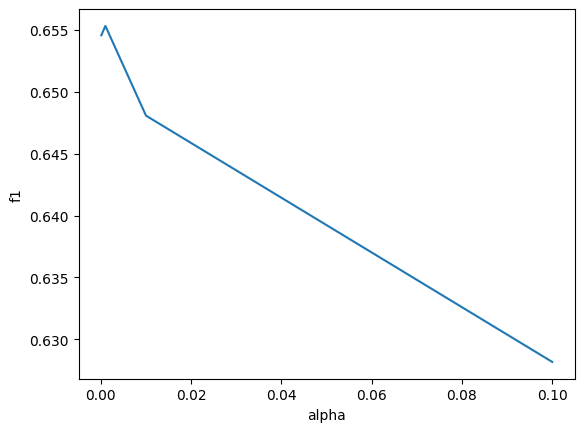

In [75]:
sns.lineplot(data = alpha_df, x='alpha', y='f1')

In [76]:
alpha_df = alpha_df.sort_values(by='f1', ascending=False)
alpha_df.head()

,alpha,f1
1,0.0010,0.655331
0,0.0001,0.654573
2,0.0100,0.648076
3,0.1000,0.628167


In [77]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mlp = MLPClassifier(alpha=0.001, random_state=42, max_iter=500)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

scores

[0.6647747428166016,
 0.6480608916274012,
 0.6676703048550997,
 0.6314589665653495,
 0.6646884272997032]

In [78]:
np.mean(scores), np.min(scores), np.max(scores)

(0.655330666632831, 0.6314589665653495, 0.6676703048550997)

The best result was achieved with alpha=**0.0010**, providing an F1-score of **0.655331**, indicating a balance between preventing overfitting and maintaining predictive accuracy.

#### ``solver``

The **`solver`** parameter determines the optimization algorithm used for training:

* **`lbfgs`** A quasi-Newton method, faster for smaller datasets but sensitive to scaling and convergence.
* **`sgd`** Stochastic Gradient Descent, suitable for large datasets and customizable with learning rate adjustments.
* **`adam`** Adaptive Moment Estimation, robust and efficient for most datasets, especially deep networks.

In [82]:
solver_values = ['lbfgs', 'sgd', 'adam']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_solver = []

for solver in solver_values:
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        mlp = MLPClassifier(solver=solver, random_state=42, max_iter=1500)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)

        scores.append(f1_score(y_test, y_pred))

    scores_solver.append((solver, np.mean(scores)))

scores_solver

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

[('lbfgs', 0.6619080059985775),
 ('sgd', 0.6302589419200297),
 ('adam', 0.6545727723028589)]

In [83]:
solver_df = pd.DataFrame(scores_solver, columns=['solver', 'f1'])
solver_df

,solver,f1
0,lbfgs,0.661908
1,sgd,0.630259
2,adam,0.654573


In [84]:
solver_df = solver_df.sort_values(by='f1', ascending=False)
solver_df.head()

,solver,f1
0,lbfgs,0.661908
2,adam,0.654573
1,sgd,0.630259


While **`lbfgs`** had the highest F1-score of **0.661908**, its failure to converge made it impractical. The **`adam`** solver was selected for its stable and consistent performance, achieving an F1-score of **0.654573**.

In [86]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mlp = MLPClassifier(solver='lbfgs', random_state=42, max_iter=1500)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

scores

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

[0.6533284830847581,
 0.6577086280056577,
 0.6772291820191599,
 0.6506724827335514,
 0.6706012541497602]

**Convergence Warning for lbfgs**

---

 Despite scaling and normalizing the dataset and increasing `max_iter`, the lbfgs solver consistently failed to converge. Given this limitation, I opted to use `adam`, which showed reliable performance without such issues.

In [88]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mlp = MLPClassifier(solver='adam', random_state=42, max_iter=500)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

scores

[0.6511802173098539,
 0.6462882096069869,
 0.6714125140502061,
 0.6439169139465876,
 0.6600660066006601]

In [89]:
np.mean(scores), np.min(scores), np.max(scores)

(0.6545727723028589, 0.6439169139465876, 0.6714125140502061)

I chose the **`adam`** solver with an F1-score of **0.654573** due to its robustness and reliability for this dataset.

### Result

In [90]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mlp = MLPClassifier(hidden_layer_sizes=(100,50,25), activation='relu', learning_rate_init=0.01, alpha=0.001, solver='adam', random_state=42, max_iter=500)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

scores

[0.6627393225331369,
 0.687302145620823,
 0.6781954887218045,
 0.6419847328244275,
 0.6490272373540856]

In [91]:
np.mean(scores), np.min(scores), np.max(scores)

(0.6638497854108555, 0.6419847328244275, 0.687302145620823)

| **MLP Tuning Results**     | **Best Value**     | **F1-Score** |
|-----------------------------|--------------------|--------------|
| No Parameters Tuned        | -                 | 0.654573     |
| max_iter                   | 340               | 0.654573     |
| hidden_layer_sizes          | (100, 20, 25)     | 0.674636     |
| activation                 | relu              | 0.654573     |
| learning_rate_init          | 0.01              | 0.662137     |
| learning_rate              | constant          | 0.654573     |
| alpha                      | 0.001             | 0.655331     |
| solver                     | adam              | 0.654573     |
| Combined Tuning            | -          | 0.663850     |
